# Pharma Dataset - Beginners

# Objective

A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

Now I am the best data scientist in Greenland and they've hired me to solve this problem. Now I have a responsibility for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

## Dataset & Data Description

The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

    * Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
    * Survived_1_year == 1, implies that the patient survived after 1 year of treatment

In [ ]:
# !pip install lazypredict

In [ ]:
# !pip install xgboost

In [ ]:
# !pip install catboost

In [ ]:
# !pip install lightgbm

In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#import libraries 
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 100
#libraries for machine learning
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# import lazypredict

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [ ]:
# pharma_profile = ProfileReport(pharma_data)

In [ ]:
# pharma_profile

In [ ]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

## Data Description:

|Column Name|Description|
|:----|:----|
|ID_Patient_Care_Situation:|Care situation of a patient during treatment|
|Diagnosed_Condition:|The diagnosed condition of the patient|
|Patient_ID:|Patient identifier number|
|Treatment_with_drugs:|Class of drugs used during treatment|
|Survived_1_year:|If the patient survived after one year (0 means did not survive; 1 means survived)|
|Patient_Age:|Age of the patient|
|Patient_Body_Mass_Index:|A calculated value based on the patient’s weight, height, etc.|
|Patient_Smoker:|If the patient was a smoker or not|
|Patient_Rural_Urban:|If the patient stayed in Rural or Urban part of the country|
|Previous_Condition:|Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively.)|
|Number_of_prev_cond|It will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case.|

## Evaluation Criteria

Submissions are evaluated based on the F1 Score calculated using the predicted value of your model and true value of of Survived_1_year on the unseen new test dataset mentioned under submission guidelines.

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
pharma_data.head(40)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
pharma_data['Survived_1_year'].value_counts(dropna = False)

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [ ]:
round(pharma_data['Survived_1_year'].value_counts(normalize = True)* 100, 2)

1    63.22
0    36.78
Name: Survived_1_year, dtype: float64

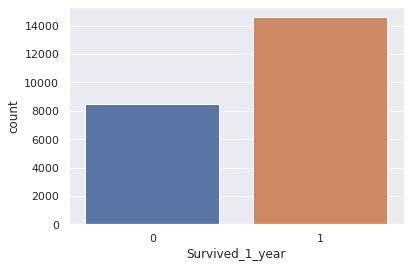

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Survived_1_year',  data=pharma_data)
plt.show()

In [ ]:
print("Unique Value Count:")
cols = pharma_data.columns.tolist()
for col in cols:
  print(col + " = " + str(len(pharma_data[col].unique())))

Unique Value Count:
ID_Patient_Care_Situation = 23097
Diagnosed_Condition = 53
Patient_ID = 10570
Treated_with_drugs = 33
Patient_Age = 78
Patient_Body_Mass_Index = 10570
Patient_Smoker = 3
Patient_Rural_Urban = 2
Patient_mental_condition = 1
A = 3
B = 3
C = 3
D = 3
E = 3
F = 3
Z = 3
Number_of_prev_cond = 6
Survived_1_year = 2


In [ ]:
pharma_data['Treated_with_drugs'].value_counts(dropna = False)

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
NaN                       13
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [ ]:
pharma_data.groupby(['Survived_1_year'])['Treated_with_drugs'].value_counts()

Survived_1_year  Treated_with_drugs  
0                DX6                     4943
                 DX2                      549
                 DX4                      548
                 DX3                      479
                 DX1                      460
                                         ... 
1                DX1 DX3 DX4 DX5           17
                 DX2 DX3 DX4 DX5           16
                 DX1 DX2 DX4 DX5           13
                 DX1 DX2 DX3 DX5           12
                 DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, Length: 63, dtype: int64

In [ ]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [ ]:
tempdata_notsurvived = pharma_data[pharma_data['Survived_1_year'] == 0]
tempdata_notsurvived['Survived_1_year'].value_counts()

0    8494
Name: Survived_1_year, dtype: int64

In [ ]:
tempdata_notsurvived['Treated_with_drugs'].value_counts()

DX6                 4943
DX2                  549
DX4                  548
DX3                  479
DX1                  460
DX5                  351
DX1 DX2              155
DX2 DX4              123
DX3 DX4              115
DX2 DX3              110
DX1 DX4               96
DX4 DX5               93
DX1 DX3               79
DX2 DX5               68
DX3 DX5               61
DX1 DX5               47
DX1 DX2 DX4           33
DX1 DX2 DX3           32
DX2 DX3 DX4           28
DX1 DX2 DX5           21
DX3 DX4 DX5           16
DX1 DX3 DX4           15
DX1 DX3 DX5           15
DX2 DX3 DX5           15
DX2 DX4 DX5           12
DX1 DX3 DX4 DX5        7
DX2 DX3 DX4 DX5        6
DX1 DX2 DX4 DX5        5
DX1 DX2 DX3 DX4        5
DX1 DX4 DX5            5
DX1 DX2 DX3 DX5        2
Name: Treated_with_drugs, dtype: int64

In [ ]:
tempdata_notsurvived.isnull().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             0
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            287
B                            287
C                            287
D                            287
E                            287
F                            287
Z                            287
Number_of_prev_cond          287
Survived_1_year                0
dtype: int64

In [ ]:
tempdata_survived = pharma_data[pharma_data['Survived_1_year'] == 1]
tempdata_survived['Survived_1_year'].value_counts()

1    14603
Name: Survived_1_year, dtype: int64

In [ ]:
tempdata_survived['Treated_with_drugs'].value_counts()

DX6                     3663
DX5                     1558
DX1                     1375
DX2                     1355
DX3                     1351
DX4                     1244
DX1 DX5                  355
DX3 DX5                  346
DX1 DX3                  345
DX3 DX4                  333
DX2 DX5                  332
DX4 DX5                  330
DX1 DX4                  312
DX2 DX4                  296
DX1 DX2                  293
DX2 DX3                  288
DX1 DX3 DX5               86
DX1 DX2 DX5               82
DX3 DX4 DX5               80
DX2 DX3 DX5               76
DX1 DX4 DX5               75
DX1 DX3 DX4               75
DX2 DX4 DX5               72
DX1 DX2 DX4               66
DX1 DX2 DX3               63
DX2 DX3 DX4               59
DX1 DX2 DX3 DX4           19
DX1 DX3 DX4 DX5           17
DX2 DX3 DX4 DX5           16
DX1 DX2 DX4 DX5           13
DX1 DX2 DX3 DX5           12
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [ ]:
tempdata_survived.isnull().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs            13
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            948
B                            948
C                            948
D                            948
E                            948
F                            948
Z                            948
Number_of_prev_cond          948
Survived_1_year                0
dtype: int64

In [ ]:
mode_Treated_with_drugs = tempdata_survived['Treated_with_drugs'].mode()
mode_Treated_with_drugs[0]

'DX6'

In [ ]:
pharma_data['Treated_with_drugs'].fillna(mode_Treated_with_drugs[0], inplace =True)

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
tempdata_notsurvived['A'].value_counts(dropna = False)

1.0    7529
0.0     678
NaN     287
Name: A, dtype: int64

In [ ]:
tempdata_survived['A'].value_counts(dropna = False)

1.0    12101
0.0     1554
NaN      948
Name: A, dtype: int64

In [ ]:
tempdata_notsurvived[(tempdata_notsurvived['A'].isnull())][['B','C','D','E','F','Z','Number_of_prev_cond']].isnull().sum()

B                      287
C                      287
D                      287
E                      287
F                      287
Z                      287
Number_of_prev_cond    287
dtype: int64

In [ ]:
tempdata_survived[(tempdata_survived['A'].isnull())][['B','C','D','E','F','Z','Number_of_prev_cond']].isnull().sum()

B                      948
C                      948
D                      948
E                      948
F                      948
Z                      948
Number_of_prev_cond    948
dtype: int64

In [ ]:
a_survived = tempdata_survived['A'].mode()
a_survived

0    1.0
dtype: float64

In [ ]:
b_survived = tempdata_survived['B'].mode()
b_survived

0    0.0
dtype: float64

In [ ]:
c_survived = tempdata_survived['C'].mode()
c_survived

0    0.0
dtype: float64

In [ ]:
d_survived = tempdata_survived['D'].mode()
d_survived

0    0.0
dtype: float64

In [ ]:
e_survived = tempdata_survived['E'].mode()
e_survived

0    0.0
dtype: float64

In [ ]:
f_survived = tempdata_survived['F'].mode()
f_survived

0    0.0
dtype: float64

In [ ]:
z_survived= tempdata_survived['Z'].mode()
z_survived

0    0.0
dtype: float64

In [ ]:
prevcond_survived = tempdata_survived['Number_of_prev_cond'].mode()
prevcond_survived

0    1.0
dtype: float64

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 1) & (pharma_data['A'].isnull())),'A'] = a_survived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 1) & (pharma_data['B'].isnull())),'B'] = b_survived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 1) & (pharma_data['C'].isnull())),'C'] = c_survived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 1) & (pharma_data['D'].isnull())),'D'] = d_survived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 1) & (pharma_data['E'].isnull())),'E'] = e_survived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 1) & (pharma_data['F'].isnull())),'F'] = f_survived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 1) & (pharma_data['Z'].isnull())),'Z'] = z_survived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 1) & (pharma_data['Number_of_prev_cond'].isnull())),'Number_of_prev_cond'] = prevcond_survived[0]

In [ ]:
pharma_data[pharma_data['Survived_1_year'] == 1].isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [ ]:
a_notsurvived = tempdata_notsurvived['A'].mode()
a_notsurvived

0    1.0
dtype: float64

In [ ]:
b_notsurvived = tempdata_notsurvived['B'].mode()
b_notsurvived

0    0.0
dtype: float64

In [ ]:
tempdata_notsurvived['B'].value_counts()

0.0    6907
1.0    1300
Name: B, dtype: int64

In [ ]:
c_notsurvived = tempdata_notsurvived['C'].mode()
c_notsurvived

0    0.0
dtype: float64

In [ ]:
tempdata_notsurvived['C'].value_counts().to_frame()

,C
0.0,6551
1.0,1656


In [ ]:
d_notsurvived= tempdata_notsurvived['D'].mode()
d_notsurvived

0    0.0
dtype: float64

In [ ]:
tempdata_notsurvived['D'].value_counts()

0.0    7211
1.0     996
Name: D, dtype: int64

In [ ]:
tempdata_notsurvived['E'].mode()

0    0.0
dtype: float64

In [ ]:
e_notsurvived = tempdata_notsurvived['E'].value_counts()
e_notsurvived

0.0    5091
1.0    3116
Name: E, dtype: int64

In [ ]:
#e_notsurvivedsecond = np.where(e_notsurvived == 3116)
e_notsurvived.to_frame()

,E
0.0,5091
1.0,3116


In [ ]:
e_notsurvived.index[1]

1.0

In [ ]:
e_notsurvived.values[1]

3116

In [ ]:
f_notsurvived = tempdata_notsurvived['F'].mode()
f_notsurvived

0    0.0
dtype: float64

In [ ]:
tempdata_notsurvived['F'].value_counts()

0.0    7776
1.0     431
Name: F, dtype: int64

In [ ]:
z_notsurvived = tempdata_notsurvived['Z'].mode()
z_notsurvived

0    0.0
dtype: float64

In [ ]:
tempdata_notsurvived['Z'].value_counts()

0.0    8207
Name: Z, dtype: int64

In [ ]:
prevcond_notsurvived = tempdata_notsurvived['Number_of_prev_cond'].mode()
prevcond_notsurvived

0    2.0
dtype: float64

In [ ]:
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# for cols in ["A", "B", "C", "D", "E", "F", "Z", "Number_of_prev_cond"]:
#     pharma_data[cols] = impute.fit_transform(pharma_data[[cols]])

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 0) & (pharma_data['A'].isnull())),'A'] = a_notsurvived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 0) & (pharma_data['B'].isnull())),'B'] = b_notsurvived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 0) & (pharma_data['C'].isnull())),'C'] = c_notsurvived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 0) & (pharma_data['D'].isnull())),'D'] = d_notsurvived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 0) & (pharma_data['E'].isnull())),'E'] = e_notsurvived.index[1]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 0) & (pharma_data['F'].isnull())),'F'] = f_notsurvived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 0) & (pharma_data['Z'].isnull())),'Z'] = z_notsurvived[0]

In [ ]:
pharma_data.loc[((pharma_data['Survived_1_year'] == 0) & (pharma_data['Number_of_prev_cond'].isnull())),'Number_of_prev_cond'] = prevcond_notsurvived[0]

In [ ]:
pharma_data[pharma_data['Survived_1_year'] == 0].isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [ ]:
pharma_data.shape

(23097, 18)

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

In [ ]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [ ]:
round(pharma_data['Survived_1_year'].value_counts(normalize = True)* 100, 2)

1    63.22
0    36.78
Name: Survived_1_year, dtype: float64

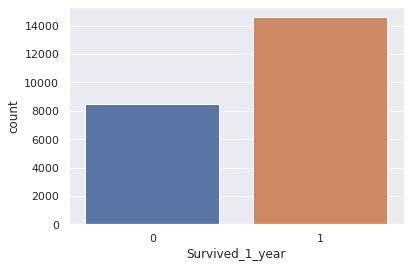

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Survived_1_year',  data=pharma_data)
plt.show()

In [ ]:
pharma_data['Patient_Smoker'].value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [ ]:
pharma_data.groupby('Survived_1_year')['Patient_Smoker'].value_counts()

Survived_1_year  Patient_Smoker
0                YES               5015
                 NO                3479
1                NO                9767
                 YES               4823
                 Cannot say          13
Name: Patient_Smoker, dtype: int64

In [ ]:
pharma_data = pd.get_dummies(pharma_data, columns=['Patient_Smoker', 'Patient_Rural_Urban','Patient_mental_condition'])

In [ ]:
pharma_data['DX6'] = pharma_data['Treated_with_drugs'].apply(lambda x: 1 if 'DX6' in x else 0)

In [ ]:
pharma_data['DX5'] = pharma_data['Treated_with_drugs'].apply(lambda x: 1  if 'DX5' in x  else 0)

In [ ]:
pharma_data['DX4'] = pharma_data['Treated_with_drugs'].apply(lambda x: 1 if 'DX4' in x  else 0)

In [ ]:
pharma_data['DX3'] = pharma_data['Treated_with_drugs'].apply(lambda x: 1 if 'DX3' in x  else 0)

In [ ]:
pharma_data['DX2'] = pharma_data['Treated_with_drugs'].apply(lambda x: 1 if 'DX2' in x  else 0)

In [ ]:
pharma_data['DX1'] = pharma_data['Treated_with_drugs'].apply(lambda x: 1 if 'DX1' in x  else 0)

In [ ]:
pharma_data.drop(['Treated_with_drugs'], axis =1, inplace = True)

In [ ]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year',
       'Patient_Smoker_Cannot say', 'Patient_Smoker_NO', 'Patient_Smoker_YES',
       'Patient_Rural_Urban_RURAL', 'Patient_Rural_Urban_URBAN',
       'Patient_mental_condition_Stable', 'DX6', 'DX5', 'DX4', 'DX3', 'DX2',
       'DX1'],
      dtype='object')

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID_Patient_Care_Situation        23097 non-null  int64  
 1   Diagnosed_Condition              23097 non-null  int64  
 2   Patient_ID                       23097 non-null  int64  
 3   Patient_Age                      23097 non-null  int64  
 4   Patient_Body_Mass_Index          23097 non-null  float64
 5   A                                23097 non-null  float64
 6   B                                23097 non-null  float64
 7   C                                23097 non-null  float64
 8   D                                23097 non-null  float64
 9   E                                23097 non-null  float64
 10  F                                23097 non-null  float64
 11  Z                                23097 non-null  float64
 12  Number_of_prev_con

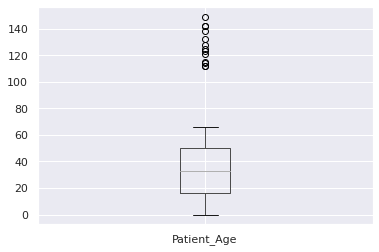

In [ ]:
pharma_data.boxplot(column=['Patient_Age'])
plt.show()

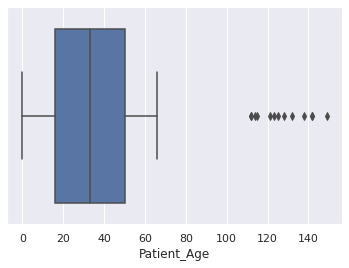

In [ ]:
sns.boxplot(x=pharma_data['Patient_Age'])

In [ ]:
X = pharma_data.drop('Survived_1_year', axis = 1)
y = pharma_data['Survived_1_year']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18477 entries, 1688 to 2915
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID_Patient_Care_Situation        18477 non-null  int64  
 1   Diagnosed_Condition              18477 non-null  int64  
 2   Patient_ID                       18477 non-null  int64  
 3   Patient_Age                      18477 non-null  int64  
 4   Patient_Body_Mass_Index          18477 non-null  float64
 5   A                                18477 non-null  float64
 6   B                                18477 non-null  float64
 7   C                                18477 non-null  float64
 8   D                                18477 non-null  float64
 9   E                                18477 non-null  float64
 10  F                                18477 non-null  float64
 11  Z                                18477 non-null  float64
 12  Number_of_prev_c

In [ ]:
# # import sys
# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

In [ ]:
xgbc = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=5
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
gs = GridSearchCV(
    estimator=xgbc,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [106]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   37.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 18.7min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 36.2min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed: 48.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=5, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
         

In [107]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=5,
              silent=None, subsample=1, verbosity=1)

In [108]:
# finding our predicted values
pred = gs.predict(X_test)

In [109]:
gs.score(X_test, y_test)

0.9250125995710474

In [110]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 2634
True Negative 1257
False Positive 421
False Negative 308


In [111]:
precision_score(y_test, pred)

0.8621931260229132

In [112]:
f1_score(y_test, pred)

0.8784392196098049

In [113]:
roc_auc_score(y_test, pred)

0.8222076960286637

In [114]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_new.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond'],
      dtype='object')

In [115]:
test_new.shape

(9303, 17)

In [116]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
test_new['Patient_Smoker'].value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

In [118]:
test_new.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [119]:
 test_new['Patient_Smoker_Cannot say'] = 0

In [120]:
test_new['Patient_Smoker_Cannot say'].value_counts()

0    9303
Name: Patient_Smoker_Cannot say, dtype: int64

In [121]:
test_new = pd.get_dummies(test_new, columns=['Patient_Smoker', 'Patient_Rural_Urban','Patient_mental_condition'])

In [122]:
test_new['DX6'] = test_new['Treated_with_drugs'].apply(lambda x: 1 if 'DX6' in x  else 0)

In [123]:
test_new['DX5'] = test_new['Treated_with_drugs'].apply(lambda x: 1 if 'DX5' in x  else 0)

In [124]:
test_new['DX4'] = test_new['Treated_with_drugs'].apply(lambda x: 1 if 'DX4' in x  else 0)

In [125]:
test_new['DX3'] = test_new['Treated_with_drugs'].apply(lambda x: 1 if 'DX3' in x  else 0)

In [126]:
test_new['DX2'] = test_new['Treated_with_drugs'].apply(lambda x: 1 if 'DX2' in x  else 0)

In [127]:
test_new['DX1'] = test_new['Treated_with_drugs'].apply(lambda x: 1 if 'DX1' in x  else 0)

In [128]:
test_new.drop(['Treated_with_drugs'], axis =1, inplace = True)

In [129]:
test_new.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Patient_Smoker_Cannot say',
       'Patient_Smoker_NO', 'Patient_Smoker_YES', 'Patient_Rural_Urban_RURAL',
       'Patient_Rural_Urban_URBAN', 'Patient_mental_condition_Stable', 'DX6',
       'DX5', 'DX4', 'DX3', 'DX2', 'DX1'],
      dtype='object')

In [130]:
newtest_pred = gs.predict(test_new)

In [131]:
# res = pd.DataFrame(newtest_pred)
# res.index = test_new.index # its important for comparison
# res.columns = ['Survived_1_year']
# res.to_csv('8020HyperparametermodelCustomEncodingRandomForestClassifierLastAttempt_A.csv')      # the csv file will be saved locally on the same location where this notebook is located.
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(newtest_pred)
res.index = test_new.index # its important for comparison
res.columns = ['Survived_1_year']

# To download the csv file locally
from google.colab import files
res.to_csv('8020HyperparametermodelCustomEncodingXGBClassifier.csv')         
files.download('8020HyperparametermodelCustomEncodingXGBClassifier.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

submission no.: #4198311
submitted on: July 10, 2020 01:55
SUBMISSION STATUS: accepted
programming language: Python 3.x (python 3.5.3)
memory: 28624kB
execution time: 0.02s
RESULT IN POINTS: **87.282215**